In [1]:
# Part 1: Importing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as k
from sklearn.model_selection import train_test_split

In [2]:
# Part 2: Reading the Dataset
df = pd.read_csv('/content/train.csv')
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522602,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2.0,0.0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2.0,1.0
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2.0,1.0
3,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2.0,0.0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2.0,0.0


In [3]:
label = ['condition']
features = ['MEAN_RR','RMSSD','pNN25','pNN50','LF','HF','LF_HF']
# Handling missing or invalid values in target labels
df = df.dropna(subset=label)  # Drop rows with missing values in the target label
df = df[df[label[0]].isin([0, 1, 2])]  # Filter out rows with invalid target labels


In [4]:
# Standardize the features
scaler = StandardScaler()
scaler.fit(df[features])
df[features] = scaler.transform(df[features])

In [5]:

# Part 4: Splitting the Dataset
X = df[features].values
y = df[label].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


In [6]:

# Part 5: One-Hot Encoding the Target Labels
y_train = k.utils.to_categorical(y_train, num_classes=3)
y_test = k.utils.to_categorical(y_test, num_classes=3)


In [7]:
# Part 6: Creating and Compiling the Model
model = k.Sequential([
    k.layers.Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    k.layers.Dense(20, activation='relu', kernel_initializer='he_normal'),
    k.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),
    k.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [8]:
# Part 7: Training the Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=1024, verbose=1)

Epoch 1/50
8/8 [==============================] - 1s 39ms/step - loss: 1.1784 - accuracy: 0.4683 - val_loss: 1.0772 - val_accuracy: 0.5123
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 1.0434 - accuracy: 0.5209 - val_loss: 0.9928 - val_accuracy: 0.5500
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.9803 - accuracy: 0.5647 - val_loss: 0.9567 - val_accuracy: 0.5720
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.9479 - accuracy: 0.5746 - val_loss: 0.9272 - val_accuracy: 0.5768
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.9227 - accuracy: 0.5754 - val_loss: 0.9037 - val_accuracy: 0.5905
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.9027 - accuracy: 0.5921 - val_loss: 0.8865 - val_accuracy: 0.6049
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8860 - accuracy: 0.6014 - val_loss: 0.8715 - val_accuracy: 0.6059
Epoch 8/50
8/8 [=============

<Axes: >

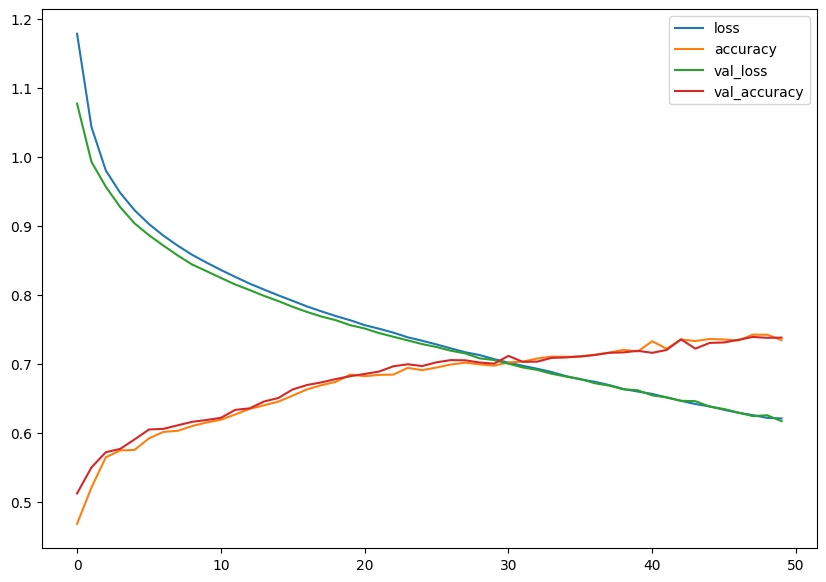

In [9]:
pd.DataFrame(history.history).plot(figsize=(10,7))

In [10]:
df_test = pd.read_csv('test.csv')

In [11]:
df_test[features] = scaler.transform(df_test[features])
df_test[features].head()

,MEAN_RR,RMSSD,pNN25,pNN50,LF,HF,LF_HF
0,-1.000796,-0.636210,-0.602843,-0.877933,-0.573946,0.609133,-0.289412
1,-0.029079,1.054415,1.369972,-0.672983,1.090368,-0.275458,-0.157110
2,0.889502,1.552476,1.754712,0.966612,1.979452,-0.506438,0.029484
3,-0.178467,-0.779853,-0.627401,-0.331401,-0.766512,-0.472116,-0.237616
4,-0.722742,-0.393378,-0.480054,-0.194768,-0.734454,-0.083643,-0.274434


In [12]:
X = df_test[features].values
y = df_test[label].values

In [13]:
y = k.utils.to_categorical(y)

In [14]:
loss,acc = model.evaluate(X,y,verbose=1)

1283/1283 [==============================] - 5s 4ms/step - loss: 0.6180 - accuracy: 0.7412


**# Final Pipeline for prediction**

In [15]:
data = pd.read_csv('test.csv')
t = scaler.transform(data[features].iloc[5545].values.reshape(1,-1))
print(t)

[[-0.77063046  0.25632115  0.11752108  0.62502944  0.55232614  0.51399561
  -0.26031749]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
y_pred = model.predict(t)
print(np.argmax(y_pred[0]))
print(data[label].iloc[5545])

1/1 [==============================] - 0s 94ms/step
0
condition    0
Name: 5545, dtype: int64


#SAVING MODEL

In [17]:
import joblib

joblib.dump(scaler,'scaler.joblib',compress=9)
model.save('tfmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
df = pd.read_csv('train.csv')